In [77]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
myDataBatch = np.loadtxt('InfArrayBatchFixedCull.csv', delimiter=',')
myDataNoBatch = np.loadtxt('InfArrayNoBatchFixedCull.csv', delimiter=',')
myDataNoMovement = np.loadtxt('InfArrayNoMovementFixedCull.csv', delimiter=',')
myCumDataBatch = np.loadtxt('cumInfArrayBatchFixedCull.csv', delimiter=',')
myCumDataNoBatch = np.loadtxt('cumInfArrayNoBatchFixedCull.csv', delimiter=',')
myCumDataNoMovement = np.loadtxt('cumInfArrayNoMovementFixedCull.csv', delimiter=',')

UK2001Inf = [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., #2001 Cumulative data
         8.,  11.,  12.,  12.,  15.,  19.,  26.,  34.,  38.,  47.,  52.,
        61.,  66.,  75.,  81.,  89.,  91., 101., 120., 146., 164., 176.,
       194., 215., 232., 257., 275., 295., 311., 339., 353., 369., 388.,
       406., 424., 435., 446., 459., 472., 483., 491., 503., 514., 525.,
       535., 546., 560., 574., 586., 595., 601., 607., 614., 621., 627.,
       633., 635., 647., 651., 655., 657., 660., 665., 672., 676., 678.,
       681., 682., 686., 689., 692., 694., 695., 695., 698., 699., 700.,
       700., 701., 702., 704., 706., 707., 710., 710., 711., 713., 714.,
       716., 717., 717., 720., 721., 722., 726., 730., 731., 732., 734.,
       734., 734., 734., 735., 736., 736., 738., 740., 741., 745., 746.,
       751., 751., 753., 757., 757., 759., 761., 763., 763., 766., 767.,
       768., 771., 772., 773., 773., 775., 778., 779., 784., 785., 785.,
       787., 787., 787., 789., 790., 793., 794., 798., 800., 801., 803.,
       805., 809., 810., 812., 814., 814., 815., 815., 819., 826., 828.,
       830., 830., 832., 832., 832., 833., 838., 840., 842., 843., 845.,
       845., 848., 852., 853., 855., 855., 856., 859., 863., 863., 864.,
       864., 864., 867., 870., 871., 871., 871., 873., 874., 876., 878.,
       879., 880., 880., 881., 884., 886., 886., 887., 887., 887., 888.,
       889., 889., 889., 889., 889., 889., 890., 890., 890., 890., 890.,
       891., 891., 891., 891., 892., 892., 892., 892., 892., 892., 892.,
       892., 892., 892., 892., 892., 892., 892., 892., 892., 892., 892.,
       892., 892., 892., 892., 892., 892., 892., 892., 892., 892., 892.,
       892., 892., 892., 892., 892., 892., 892., 892., 892., 892., 892.,
       892., 892., 892., 892., 892., 892., 892., 892., 892., 892., 892.,
       892., 892., 892., 892., 892., 892., 892., 892., 892., 892., 892.,
       892., 892., 892., 892., 892., 892., 892., 892., 892., 892., 892.,
       892., 892., 892., 892., 892., 892., 892., 892.] 

In [78]:
myDataBatch[~np.all(myDataBatch == 0, axis=1)]
myDataNoBatch[~np.all(myDataNoBatch == 0, axis=1)]
myDataNoMovement[~np.all(myDataNoMovement == 0, axis=1)]
myCumDataBatch[~np.all(myCumDataBatch == 0, axis=1)]
myCumDataNoBatch[~np.all(myCumDataNoBatch == 0, axis=1)]
myCumDataNoMovement[~np.all(myCumDataNoMovement == 0, axis=1)]

# myDataBatch = np.delete(myDataBatch, (0), axis=0)
# myDataNoBatch = np.delete(myDataNoBatch, (0), axis=0)
# myCumDataBatch = np.delete(myCumDataBatch, (0), axis=0)
# myCumDataNoBatch = np.delete(myCumDataNoBatch, (0), axis=0)

array([[0.000e+00, 0.000e+00, 1.000e+00, ..., 9.000e+00, 9.000e+00,
        9.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 5.000e+00, 5.000e+00,
        5.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.993e+03, 1.993e+03,
        1.993e+03],
       ...,
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 7.000e+00, 7.000e+00,
        7.000e+00],
       [0.000e+00, 2.000e+00, 2.000e+00, ..., 4.000e+00, 4.000e+00,
        4.000e+00],
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 4.000e+00, 4.000e+00,
        4.000e+00]])

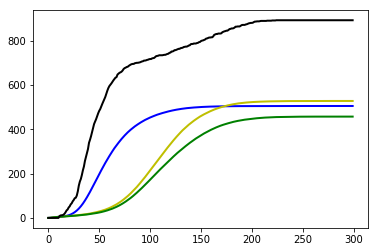

In [79]:
meanCumDataBatch1 = np.mean(myCumDataBatch,axis=0)
meanCumDataNoBatch1 = np.mean(myCumDataNoBatch,axis=0)
meanCumDataNoMovement1 = np.mean(myCumDataNoMovement,axis=0)

plt.figure()
t = np.linspace(0, 299, 300)
plt.plot(t, meanCumDataBatch1, 'b', lw=2)
plt.plot(t, meanCumDataNoBatch1, 'y', lw=2)
plt.plot(t, meanCumDataNoMovement1, 'g', lw=2)
plt.plot(t, UK2001Inf[:300], 'k', lw=2)

In [82]:
###You can use this to remove simulations that didn't result in an outbreak. This is determined by seeing if the
###cumulative level of infection is greater than epiLevel after 200 days. 

epiLevel = 150
for i in range(len(myCumDataBatch)):
    if myCumDataBatch[i,200] < epiLevel:
        myCumDataBatch[i, :] = 0
        
for i in range(len(myCumDataNoBatch)):
    if myCumDataNoBatch[i,200] < epiLevel:
        myCumDataNoBatch[i, :] = 0
        
for i in range(len(myCumDataNoMovement)):
    if myCumDataNoMovement[i,200] < epiLevel:
        myCumDataNoMovement[i, :] = 0
        
for i in range(len(myDataBatch)):
    if myCumDataBatch[i,200] < epiLevel:
        myDataBatch[i, :] = 0
        
for i in range(len(myDataNoBatch)):
    if myCumDataNoBatch[i,200] < epiLevel:
        myDataNoBatch[i, :] = 0
        
for i in range(len(myDataNoMovement)):
    if myCumDataNoMovement[i,200] < epiLevel:
        myDataNoMovement[i, :] = 0

myCumDataBatch = myCumDataBatch[~np.all(myCumDataBatch == 0, axis=1)]
myCumDataNoBatch = myCumDataNoBatch[~np.all(myCumDataNoBatch == 0, axis=1)]
myCumDataNoMovement = myCumDataNoMovement[~np.all(myCumDataNoMovement == 0, axis=1)]

myDataBatch = myDataBatch[~np.all(myDataBatch == 0, axis=1)]
myDataNoBatch = myDataNoBatch[~np.all(myDataNoBatch == 0, axis=1)]
myDataNoMovement = myDataNoMovement[~np.all(myDataNoMovement == 0, axis=1)]

meanCumDataBatch = np.mean(myCumDataBatch,axis=0)
meanCumDataNoBatch = np.mean(myCumDataNoBatch,axis=0)
meanCumDataNoMovement = np.mean(myCumDataNoMovement,axis=0)
meanDataBatch = np.mean(myDataBatch,axis=0)
meanDataNoBatch = np.mean(myDataNoBatch,axis=0)
meanDataNoMovement = np.mean(myDataNoMovement,axis=0)


sdCumDataBatch = np.std(myCumDataBatch,axis=0)
sdCumDataNoBatch = np.std(myCumDataNoBatch,axis=0)
sdCumDataNoMovement = np.std(myCumDataNoMovement,axis=0)
sdDataBatch = np.std(myDataBatch,axis=0)
sdDataNoBatch = np.std(myDataNoBatch,axis=0)
sdDataNoMovement = np.std(myDataNoMovement,axis=0)

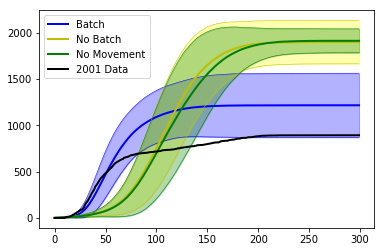

In [83]:
plt.figure()
t = np.linspace(0, 299, 300)
plt.plot(t, meanCumDataBatch, 'b', lw=2, label='Batch')
plt.plot(t, meanCumDataBatch+sdCumDataBatch, 'b', lw=0.5)
plt.plot(t, meanCumDataBatch-sdCumDataBatch, 'b', lw=0.5)


plt.plot(t, meanCumDataNoBatch, 'y', lw=2, label='No Batch')
plt.plot(t, meanCumDataNoBatch+sdCumDataNoBatch, 'y', lw=0.5)
plt.plot(t, meanCumDataNoBatch-sdCumDataNoBatch, 'y', lw=0.5)


plt.plot(t, meanCumDataNoMovement, 'g', lw=2, label='No Movement')
plt.plot(t, meanCumDataNoMovement+sdCumDataNoMovement, 'g', lw=0.5)
plt.plot(t, meanCumDataNoMovement-sdCumDataNoMovement, 'g', lw=0.5)


plt.fill_between(t, meanCumDataBatch-sdCumDataBatch, meanCumDataBatch+sdCumDataBatch, 1, alpha=0.3, color='blue')
plt.fill_between(t, meanCumDataNoBatch-sdCumDataNoBatch, meanCumDataNoBatch+sdCumDataNoBatch, 1, alpha=0.3, color='yellow')
plt.fill_between(t, meanCumDataNoMovement-sdCumDataNoMovement, meanCumDataNoMovement+sdCumDataNoMovement, 1, alpha=0.3, color='green')


plt.plot(t, UK2001Inf[:300], 'k', lw=2, label='2001 Data')
plt.legend()

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.,
        1600.]), <a list of 10 Text yticklabel objects>)

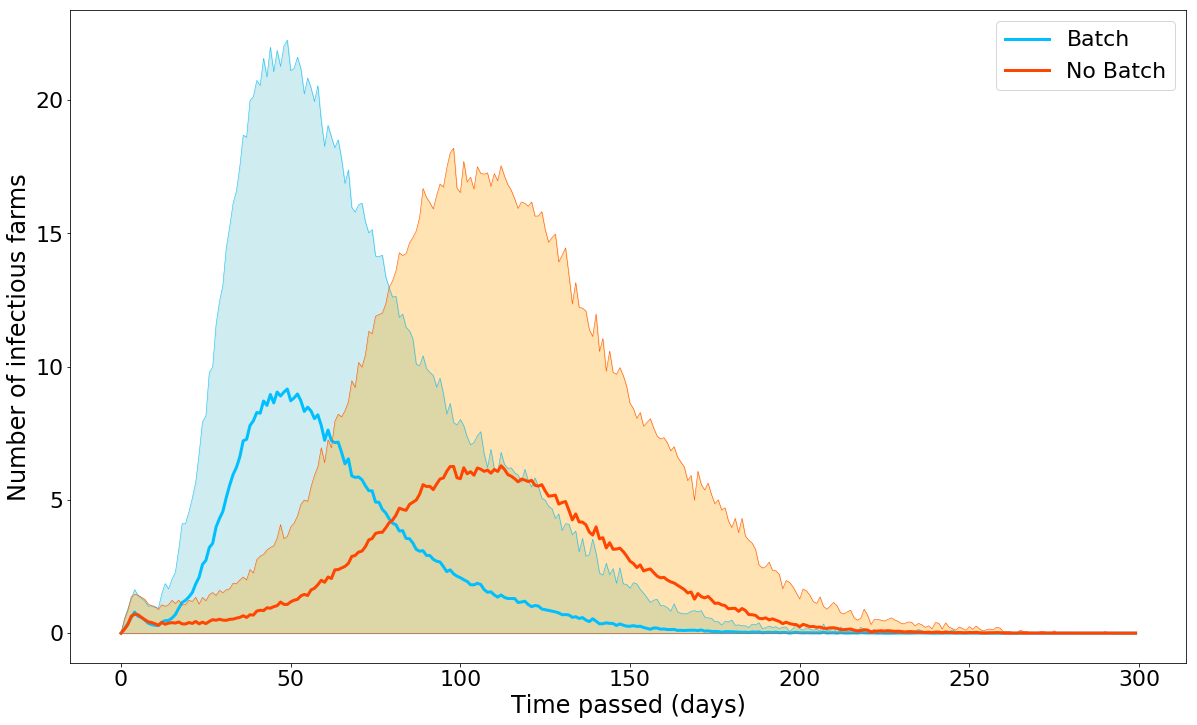

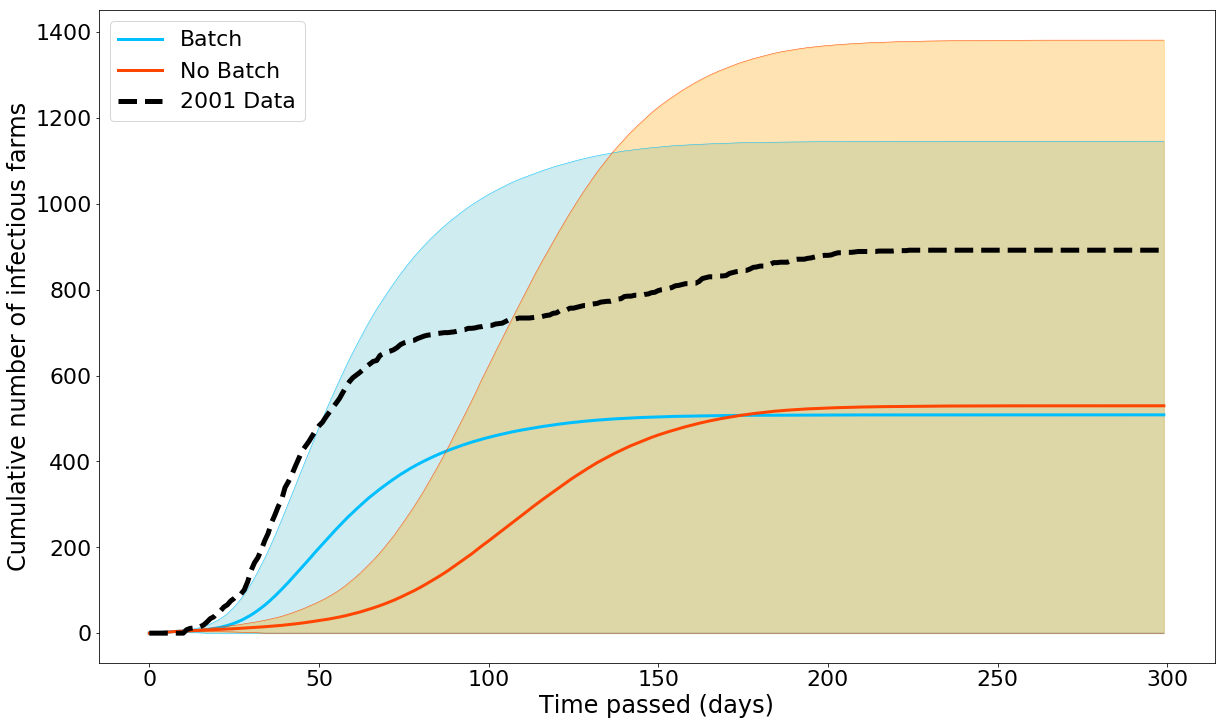

In [70]:
plt.figure(figsize = (20,12))
#plt.subplot(1,2,1)

t = np.linspace(0, 299, 300)
plt.plot(t, meanDataBatch, color='deepskyblue', lw=3, label='Batch')
plt.plot(t, meanDataBatch+sdDataBatch, color='deepskyblue', lw=0.5)
plt.plot(t, np.maximum(meanDataBatch-sdDataBatch, 0), color='deepskyblue', lw=0.5)


plt.plot(t, meanDataNoBatch, color='orangered', lw=3, label='No Batch')
plt.plot(t, meanDataNoBatch+sdDataNoBatch, color='orangered', lw=0.5)
plt.plot(t, np.maximum(meanDataNoBatch-sdDataNoBatch, 0), color='orangered', lw=0.5)


plt.fill_between(t, np.maximum(meanDataBatch-sdDataBatch, 0), meanDataBatch+sdDataBatch, 1, alpha=0.6, color='powderblue')
plt.fill_between(t, np.maximum(meanDataNoBatch-sdDataNoBatch, 0), meanDataNoBatch+sdDataNoBatch, 1, alpha=0.3, color='orange')

plt.xlabel('Time passed (days)', fontsize=24)
plt.ylabel('Number of infectious farms', fontsize=24)

plt.legend(fontsize = 22)
plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)


plt.figure(figsize = (20,12))
#plt.subplot(1,2,2)


plt.plot(t, meanCumDataBatch, color='deepskyblue', lw=3, label='Batch')
plt.plot(t, meanCumDataBatch+sdCumDataBatch, color='deepskyblue', lw=0.5)
plt.plot(t, np.maximum(meanCumDataBatch-sdCumDataBatch, 0), color='deepskyblue', lw=0.5)


plt.plot(t, meanCumDataNoBatch, color='orangered', lw=3, label='No Batch')
plt.plot(t, meanCumDataNoBatch+sdCumDataNoBatch, color='orangered', lw=0.5)
plt.plot(t, np.maximum(meanCumDataNoBatch-sdCumDataNoBatch, 0), color='orangered', lw=0.5)


plt.fill_between(t, np.maximum(meanCumDataBatch-sdCumDataBatch, 0), meanCumDataBatch+sdCumDataBatch, 1, alpha=0.6, color='powderblue')
plt.fill_between(t, np.maximum(meanCumDataNoBatch-sdCumDataNoBatch, 0), meanCumDataNoBatch+sdCumDataNoBatch, 1, alpha=0.3, color='orange')


plt.plot(t, UK2001Inf[:300], '--', color='black', lw=5, label='2001 Data')

plt.xlabel('Time passed (days)', fontsize=24)
plt.ylabel('Cumulative number of infectious farms', fontsize=24)

plt.legend(fontsize = 22)
plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)

